In [9]:
import import_ipynb
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import Plots
from tqdm import tqdm
from Optimiser import optimiser

In [10]:
# Gurobi environment. 
params = {
"WLSACCESSID": '656a0385-9063-4abe-9a9a-62c52d9bf86f',
"WLSSECRET": '965811b5-d564-49ae-bcfe-244106d2fad3',
"LICENSEID": 2404093,
}
env = gp.Env(params=params)

Set parameter Username
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2404093
Academic license - for non-commercial use only - registered to r.zhang-13@student.tudelft.nl


In [11]:
prediction_yield = [3616.96354167, 3486.45800781, 3418.65071615, 3330.74641927]
prediction_price = [7.97511163, 8.07187274, 8.07929887, 8.07096947]
prediction_demand = [2685.43017578125, 2673.31787109375, 2670.385498046875, 2668.9794921875]

In [12]:
def set_default():
    parameters = {'Th': 1,
                'Tt': 2,
                'Zt': 0.1,
                'Zh': 0.1,
                'Ztruck': 100, 
                'theta_i': 0.9,
                'theta_t': 0.9,
                'theta_r': 0.6,
                'weightPrice_more':0.0001,
                'weightPrice_less':-0.0001,
                'weightDiscount':0.5,
                'weightShortage': 2,
                'capacity_inv': 5000,
                'capacity_truck':500,
                'F_proportion': 0.3
                }
    return parameters

parameters = set_default()

In [13]:
sa_params = {
    'Tt': np.arange(2, 7),
    'Zt': np.linspace(0.1, 5, 10),
    'Zh': np.linspace(0.1, 5, 10),
    'Ztruck': np.linspace(1, 500, 10),
    'theta_i': np.linspace(0.8, 1, 10),
    'theta_t': np.linspace(0.7, 1, 10),
    'theta_r': np.linspace(0.2, 0.8, 10),
    'weightPrice_more': np.linspace(0.0001, 0.0003, 20),
    'weightPrice_less': np.linspace(-0.0003, -0.0001, 20),
    'weightDiscount': np.linspace(0.3, 0.9, 10),
    'weightShortage': np.linspace(0.1, 0.7, 10),
    'capacity_inv': np.linspace(1600, 2500, 10),
    'F_proportion': np.linspace(0.1, 1, 50)
}

## Sensitivity Analysis

In [14]:
def sensitivity_analysis(param:str, parameters:dict, space:np) -> tuple:
    '''
    Calculate the sensitivity of profit on param.

    param: The target parameter to be analysed.
    parameters: The set of parameters of the optimiser.
    space: The search grid for analysing the sensitivity.
    return: The sensitivity of the parameter and the profit record.
    '''
    profit = []
    with tqdm(total = len(space)) as pbar:
        for parameters[param] in space:
            pbar.update(1)
            strategy = optimiser(parameters, prediction_yield, prediction_demand, prediction_price, 4)
            profit.append(strategy['Profit'])
    sens = ((profit[-1] - profit[0])/profit[0]) / ((space[-1] - space[0])/space[0])
    return sens, profit

In [15]:
def SA(sa_params:dict, parameters:dict):
    '''
    Analyse the sensitivity of all the parameters in 'sa_params'.
    This function only works well with those who have a linear sensitivity.
    '''
    for param in sa_params:
        print('Analysing parameter: ' + param + '\n')
        space = sa_params[param]
        sens, profit = sensitivity_analysis(param, parameters, space)
        parameters = set_default()
        Plots.plot_lines(np.array(profit).reshape(1, -1), x=space)
        print('The sensitivity of ' + param + ' is: ' + str(sens) + '\n')

Analysing parameter: Tt



100%|██████████| 5/5 [00:50<00:00, 10.05s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


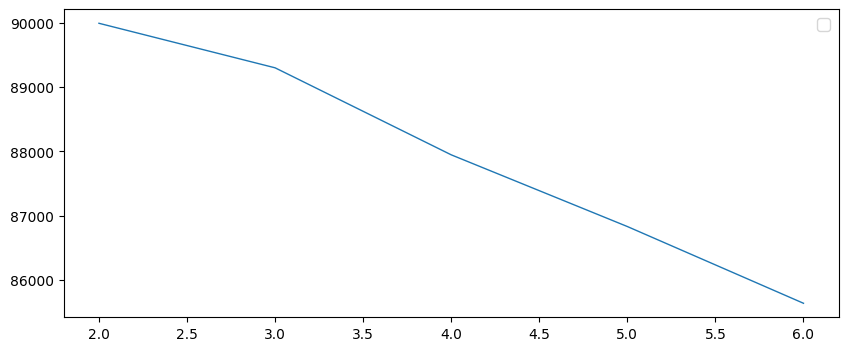

The sensitivity of Tt is: -0.02419930027080097

Analysing parameter: Zt



100%|██████████| 10/10 [01:40<00:00, 10.05s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


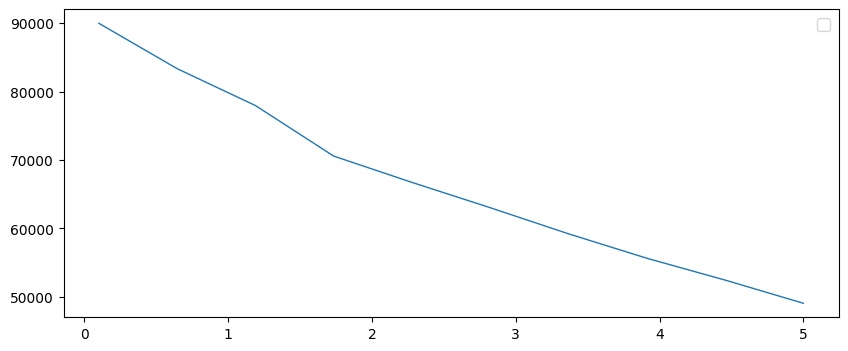

The sensitivity of Zt is: -0.009286473853739312

Analysing parameter: Zh



100%|██████████| 10/10 [01:40<00:00, 10.05s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


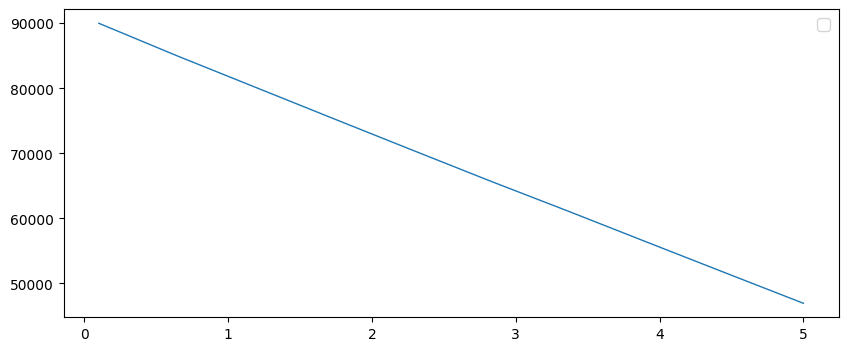

The sensitivity of Zh is: -0.009758476848495455

Analysing parameter: Ztruck



100%|██████████| 10/10 [01:40<00:00, 10.06s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


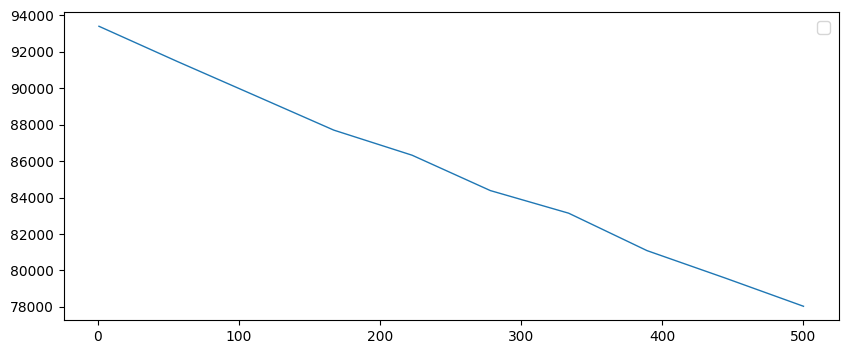

The sensitivity of Ztruck is: -0.0003298210080967014

Analysing parameter: theta_i



100%|██████████| 10/10 [01:40<00:00, 10.06s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


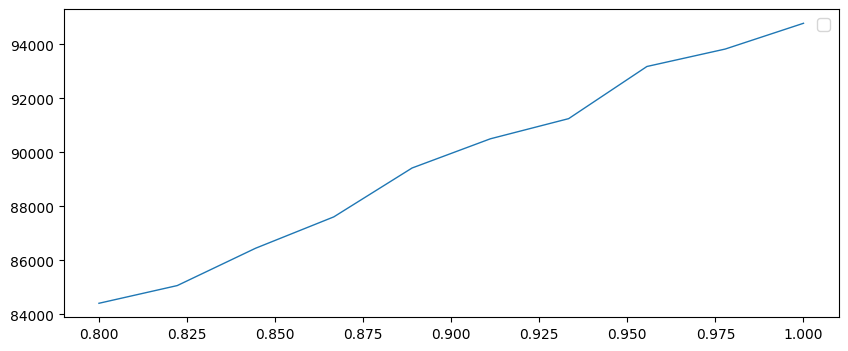

The sensitivity of theta_i is: 0.4912941479238944

Analysing parameter: theta_t



100%|██████████| 10/10 [01:40<00:00, 10.06s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


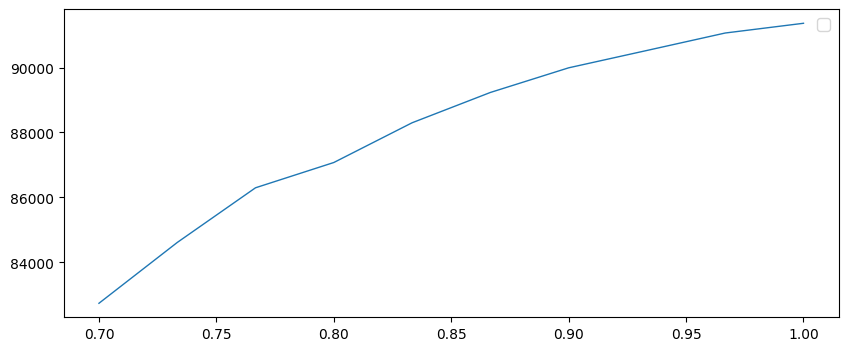

The sensitivity of theta_t is: 0.24323762512106917

Analysing parameter: theta_r



100%|██████████| 10/10 [01:25<00:00,  8.59s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


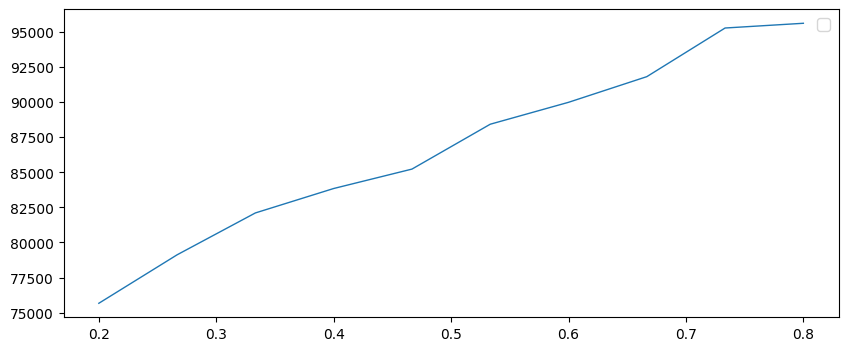

The sensitivity of theta_r is: 0.08791257324280646

Analysing parameter: weightPrice_more



100%|██████████| 20/20 [03:21<00:00, 10.06s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


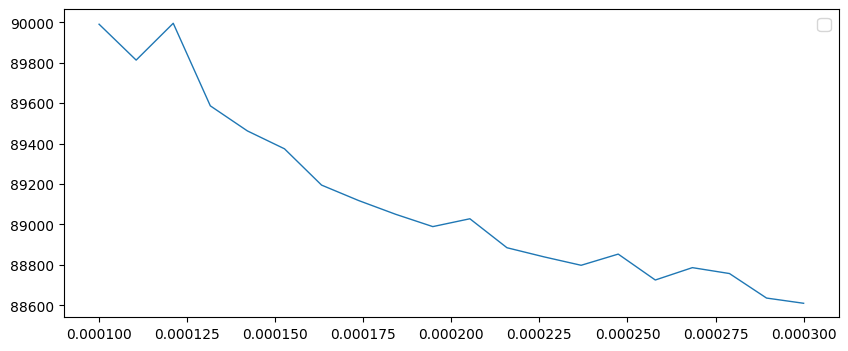

The sensitivity of weightPrice_more is: -0.007674245203546915

Analysing parameter: weightPrice_less



100%|██████████| 20/20 [03:21<00:00, 10.06s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


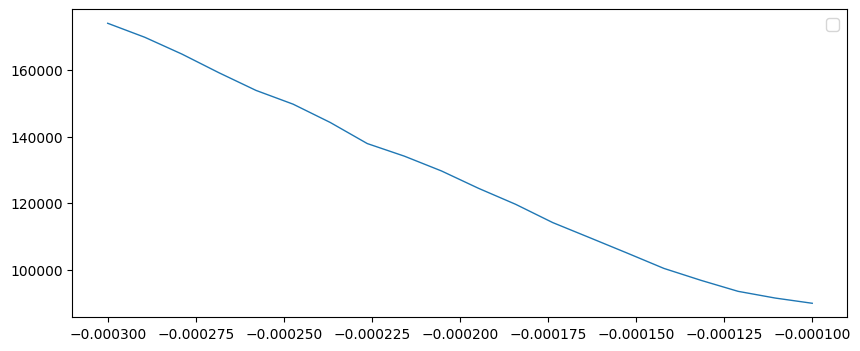

The sensitivity of weightPrice_less is: 0.7240043531947091

Analysing parameter: weightDiscount



100%|██████████| 10/10 [01:40<00:00, 10.06s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


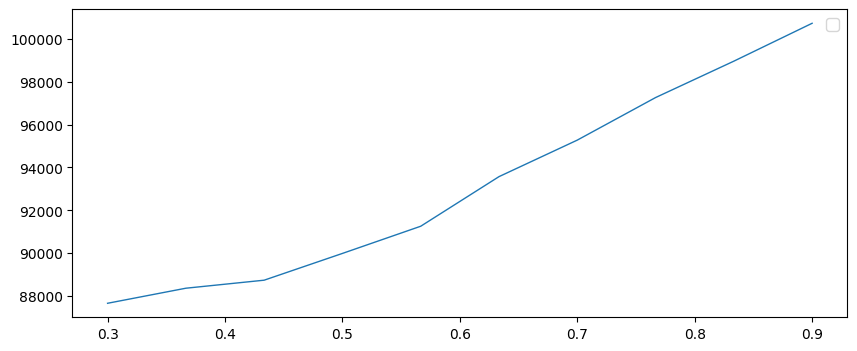

The sensitivity of weightDiscount is: 0.0745044528332685

Analysing parameter: weightShortage



100%|██████████| 10/10 [01:40<00:00, 10.06s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


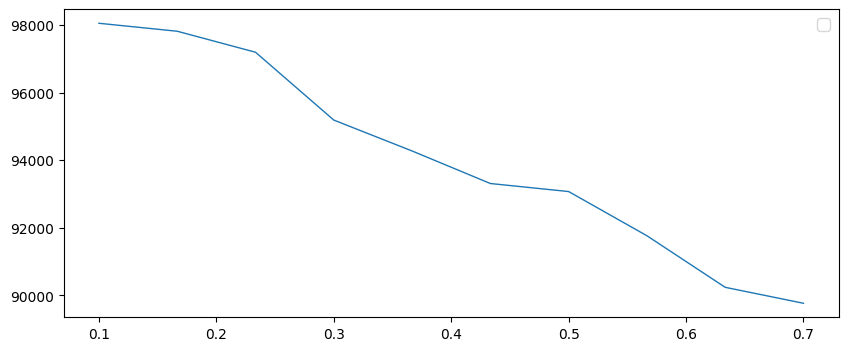

The sensitivity of weightShortage is: -0.014087984349563246

Analysing parameter: capacity_inv



100%|██████████| 10/10 [01:40<00:00, 10.05s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


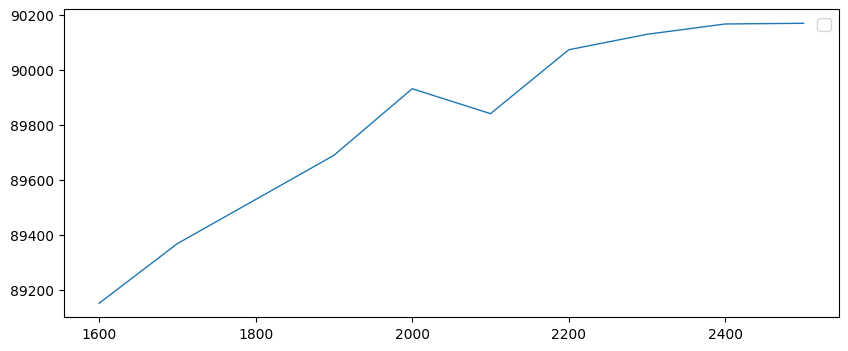

The sensitivity of capacity_inv is: 0.020269650958807835

Analysing parameter: F_proportion



100%|██████████| 50/50 [08:22<00:00, 10.06s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


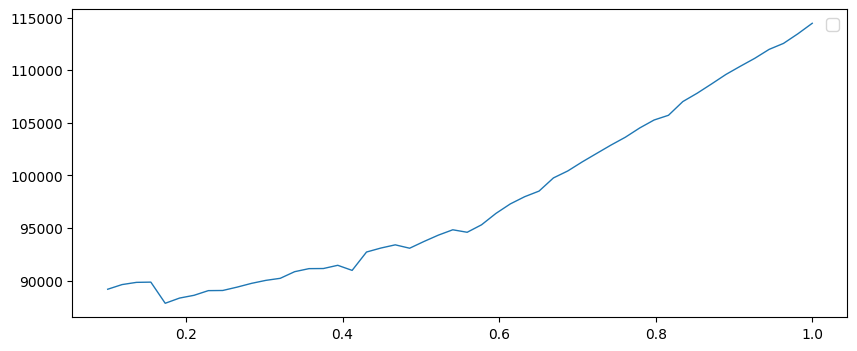

The sensitivity of F_proportion is: 0.03150952832148306



In [16]:
SA(sa_params, parameters)

# Non-linear Sensitivity Analysis.

## captruck

100%|██████████| 50/50 [08:22<00:00, 10.05s/it]


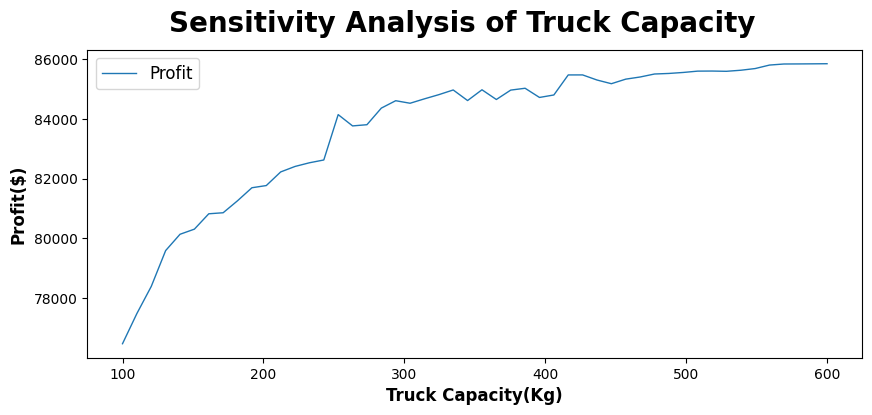

0.0244666367266781


In [17]:
space = np.linspace(100, 600, 50)
sens, profit = sensitivity_analysis('capacity_truck', parameters, space)
parameters = set_default()
Plots.plot_lines(np.array(profit).reshape(1, -1), x=space, title='Sensitivity Analysis of Truck Capacity', xlabel='Truck Capacity(Kg)', ylabel='Profit($)', label=['Profit'], show_label=1)
print(sens)